# [**696. Count Binary Substrings**](https://leetcode.com/problems/count-binary-substrings/)

<div class="content__u3I1 question-content__JfgR"><div><p>Give a binary string <code>s</code>, return the number of non-empty substrings that have the same number of <code>0</code>'s and <code>1</code>'s, and all the <code>0</code>'s and all the <code>1</code>'s in these substrings are grouped consecutively.</p>

<p>Substrings that occur multiple times are counted the number of times they occur.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> s = "00110011"
<strong>Output:</strong> 6
<strong>Explanation:</strong> There are 6 substrings that have equal number of consecutive 1's and 0's: "0011", "01", "1100", "10", "0011", and "01".
Notice that some of these substrings repeat and are counted the number of times they occur.
Also, "00110011" is not a valid substring because all the 0's (and 1's) are not grouped together.
</pre>

<p><strong>Example 2:</strong></p>

<pre><strong>Input:</strong> s = "10101"
<strong>Output:</strong> 4
<strong>Explanation:</strong> There are 4 substrings: "10", "01", "10", "01" that have equal number of consecutive 1's and 0's.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= s.length &lt;= 10<sup>5</sup></code></li>
	<li><code>s[i]</code> is either <code>'0'</code> or <code>'1'</code>.</li>
</ul>
</div></div>

---
## **Solution.py**

In [1]:
from pprint import pprint

In [1]:
from typing import List, Dict, Tuple

In [2]:
class Solution:
    def countBinarySubstrings(self, s: str) -> int:
        answer = 0
        for i in range(len(s)):
            start = s[i]
            consecutive = 1
            ss = None

            for j in range(i+1, len(s)):
                if start != s[j]:
                    ss = start*(j-i)+s[j]*(j-i)
                    break
            if ss and ss == s[i:2*j-i]:
                # print(s[i:3*j-2*i])
                answer += 1
        
        return answer

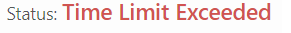

In [3]:
class Solution:
    def countBinarySubstrings(self, s: str) -> int:
        diff_idxs = []
        s_length = len(s)
        for i, c in enumerate(s):
            if c != s[i-1] and i != 0:
                diff_idxs.append(i)
        # print(diff_idxs)
        
        answer = 0
        if len(diff_idxs) == 1:
            answer += min(diff_idxs[0], s_length-diff_idxs[0])
        else:
            for i, idx in enumerate(diff_idxs):
                if i == 0:
                    answer += min(idx, diff_idxs[i+1]-idx)
                elif i == len(diff_idxs)-1:
                    answer += min(idx - diff_idxs[i-1], s_length-idx)
                else:
                    answer += min(idx-diff_idxs[i-1], diff_idxs[i+1] - idx)
                
        return answer
                

In [4]:
inputs = [
    "00110011",
    "10101"
]
outputs = [
    6,
    4
]

In [5]:
solution = Solution().countBinarySubstrings

for idx, (i, o) in enumerate(zip(inputs, outputs)):
    sol_ = solution(i)
    print(sol_==o, sol_, o)

True 6 6
True 4 4


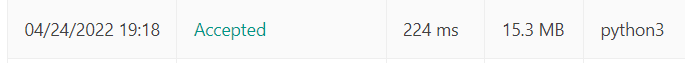

<br>

---
---

<br>

# [**2171. Removing Minimum Number of Magic Beans**](https://leetcode.com/problems/removing-minimum-number-of-magic-beans/)

<div class="content__u3I1 question-content__JfgR"><div><p>You are given an array of <strong>positive</strong> integers <code>beans</code>, where each integer represents the number of magic beans found in a particular magic bag.</p>

<p><strong>Remove</strong> any number of beans (<strong>possibly none</strong>) from each bag such that the number of beans in each remaining <strong>non-empty</strong> bag (still containing <strong>at least one</strong> bean) is <strong>equal</strong>. Once a bean has been removed from a bag, you are <strong>not</strong> allowed to return it to any of the bags.</p>

<p>Return <em>the <strong>minimum</strong> number of magic beans that you have to remove</em>.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> beans = [4,<u><strong>1</strong></u>,6,5]
<strong>Output:</strong> 4
<strong>Explanation:</strong> 
- We remove 1 bean from the bag with only 1 bean.
  This results in the remaining bags: [4,<b><u>0</u></b>,6,5]
- Then we remove 2 beans from the bag with 6 beans.
  This results in the remaining bags: [4,0,<strong><u>4</u></strong>,5]
- Then we remove 1 bean from the bag with 5 beans.
  This results in the remaining bags: [4,0,4,<b><u>4</u></b>]
We removed a total of 1 + 2 + 1 = 4 beans to make the remaining non-empty bags have an equal number of beans.
There are no other solutions that remove 4 beans or fewer.
</pre>

<p><strong>Example 2:</strong></p>

<pre><strong>Input:</strong> beans = [<strong><u>2</u></strong>,10,<u><strong>3</strong></u>,<strong><u>2</u></strong>]
<strong>Output:</strong> 7
<strong>Explanation:</strong>
- We remove 2 beans from one of the bags with 2 beans.
  This results in the remaining bags: [<u><strong>0</strong></u>,10,3,2]
- Then we remove 2 beans from the other bag with 2 beans.
  This results in the remaining bags: [0,10,3,<u><strong>0</strong></u>]
- Then we remove 3 beans from the bag with 3 beans. 
  This results in the remaining bags: [0,10,<u><strong>0</strong></u>,0]
We removed a total of 2 + 2 + 3 = 7 beans to make the remaining non-empty bags have an equal number of beans.
There are no other solutions that removes 7 beans or fewer.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= beans.length &lt;= 10<sup>5</sup></code></li>
	<li><code>1 &lt;= beans[i] &lt;= 10<sup>5</sup></code></li>
</ul>
</div></div>

## **Solution.py**

In [6]:
from typing import List, Dict, Tuple

In [7]:
class Solution:
    def minimumRemoval(self, beans: List[int]) -> int:
        sorted_idxs = sorted(range(len(beans)), key=lambda k: beans[k])
        total_beans = sum(beans)
        bean_length = len(beans)
        min_beans = total_beans
        
        for i, idx in enumerate(sorted_idxs):
            left_bean_idxs = bean_length - i 
            # print(total_beans, beans[idx] * left_bean_idxs)
            throwout_beans = total_beans - beans[idx] * left_bean_idxs
            min_beans = min(min_beans, throwout_beans)
        
        return min_beans


In [8]:
inputs = [
    [4,1,6,5],
    [2,10,3,2]
]
outputs = [
    4,
    7
]

In [9]:
solution = Solution().minimumRemoval

for idx, (i, o) in enumerate(zip(inputs, outputs)):
    sol_ = solution(i)
    print(sol_==o, sol_, o)

True 4 4
True 7 7


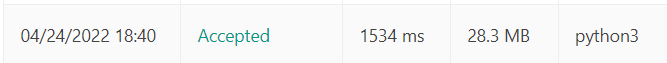